In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

DATA **PREPROCESSING**

In [30]:
dataset = pd.read_csv("/content/drive/MyDrive/survey lung cancer (1).csv")
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [31]:
dataset.shape

(309, 16)

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [33]:
dataset.describe(include='O')

,GENDER,LUNG_CANCER
count,309,309
unique,2,2
top,M,YES
freq,162,270


In [34]:
dataset.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [35]:
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [36]:
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [37]:
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["LUNG_CANCER"] = le.fit_transform(dataset["LUNG_CANCER"])
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


# 1. Minimum, Maximum and Average age of the patients

In [39]:
print(f"Min age is {dataset['AGE'].min()} and maximum age is {dataset['AGE'].max()}")
print(f"Average age is {round(dataset['AGE'].mean())}")

Min age is 21 and maximum age is 87
Average age is 63


## 2. **Who have more Lung Cancer male or female?**

In [40]:
male=dataset['GENDER'].value_counts()['M']
female=len(dataset)-male
male,female

(162, 147)

In [41]:
print(f"Percentage of females getting lung cancer {round((len(dataset.loc[(dataset['GENDER']=='F') & (dataset['LUNG_CANCER']>0)]))/female*100,2)}%")
print(f"Percentage of males getting lung cancer {round((len(dataset.loc[(dataset['GENDER']=='M') & (dataset['LUNG_CANCER']>0)]))/male*100,2)}%")

Percentage of females getting lung cancer 85.03%
Percentage of males getting lung cancer 89.51%


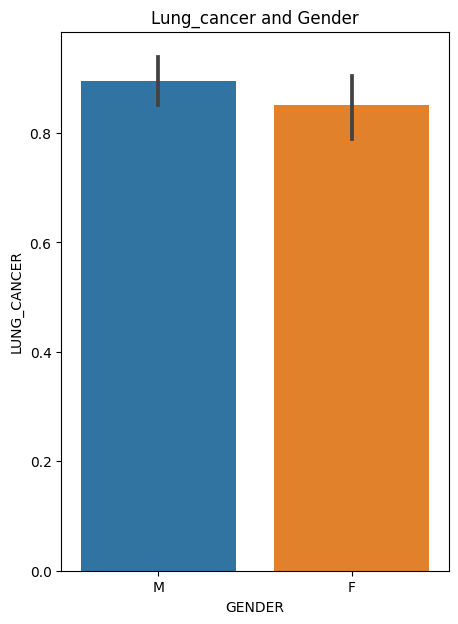

In [42]:
plt.figure(figsize=(5,7))
plt.title('Lung_cancer and Gender')
sns.barplot(x='GENDER',y='LUNG_CANCER',data=dataset)
plt.show()

## 3. **Who have more Chest pain male or female ?**


In [43]:
print(f"Percentage of females getting chest pain {round((len(dataset.loc[(dataset['GENDER']=='F') & (dataset['CHEST PAIN']>1)]))/female*100,2)}%")
print(f"Percentage of males getting chest pain {round((len(dataset.loc[(dataset['GENDER']=='M') & (dataset['CHEST PAIN']>1)]))/male*100,2)}%")

Percentage of females getting chest pain 36.73%
Percentage of males getting chest pain 72.84%


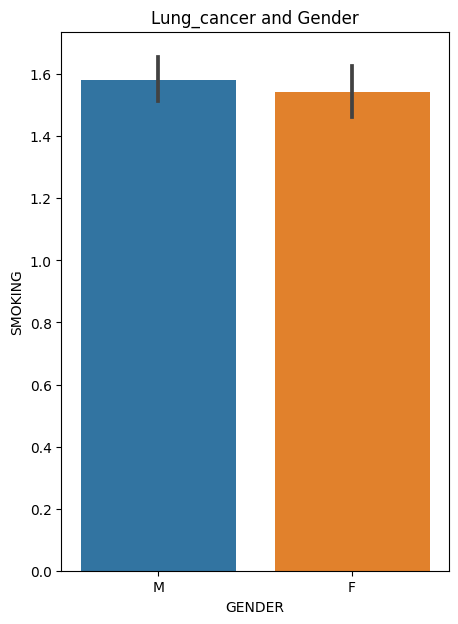

In [44]:
plt.figure(figsize=(5,7))
plt.title('Lung_cancer and Gender')
sns.barplot(x='GENDER',y='SMOKING',data=dataset)
plt.show()

## 4. **Median age of patients getting different diseases?**

In [45]:
print(dataset.groupby('SMOKING')['AGE'].median(),'\n\n')
print(dataset.groupby('YELLOW_FINGERS')['AGE'].median(),'\n\n')
print(dataset.groupby('ANXIETY')['AGE'].median(),'\n\n')
print(dataset.groupby('PEER_PRESSURE')['AGE'].median(),'\n\n')
print(dataset.groupby('CHRONIC DISEASE')['AGE'].median(),'\n\n')
print(dataset.groupby('WHEEZING')['AGE'].median(),'\n\n')
print(dataset.groupby('ALCOHOL CONSUMING')['AGE'].median(),'\n\n')
print(dataset.groupby('COUGHING')['AGE'].median(),'\n\n')
print(dataset.groupby('SHORTNESS OF BREATH')['AGE'].median(),'\n\n')
print(dataset.groupby('SWALLOWING DIFFICULTY')['AGE'].median(),'\n\n')
print(dataset.groupby('CHEST PAIN')['AGE'].median(),'\n\n')

SMOKING
1    63.0
2    62.0
Name: AGE, dtype: float64 


YELLOW_FINGERS
1    62.0
2    63.0
Name: AGE, dtype: float64 


ANXIETY
1    62.0
2    63.0
Name: AGE, dtype: float64 


PEER_PRESSURE
1    62.0
2    63.0
Name: AGE, dtype: float64 


CHRONIC DISEASE
1    63.0
2    62.0
Name: AGE, dtype: float64 


WHEEZING
1    62.0
2    63.0
Name: AGE, dtype: float64 


ALCOHOL CONSUMING
1    62.0
2    63.0
Name: AGE, dtype: float64 


COUGHING
1    61.0
2    64.0
Name: AGE, dtype: float64 


SHORTNESS OF BREATH
1    62.0
2    62.5
Name: AGE, dtype: float64 


SWALLOWING DIFFICULTY
1    63.0
2    62.0
Name: AGE, dtype: float64 


CHEST PAIN
1    63.0
2    62.0
Name: AGE, dtype: float64 




In [46]:
print(f"Median age of patient getting lung_cancer is {dataset.loc[dataset['LUNG_CANCER']==1]['AGE'].median()}")

Median age of patient getting lung_cancer is 62.5


<ipython-input-47-307dc2d3cb17>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['AGE'],bins=12)  #Show a default plot with a kernel density estimate and histogram


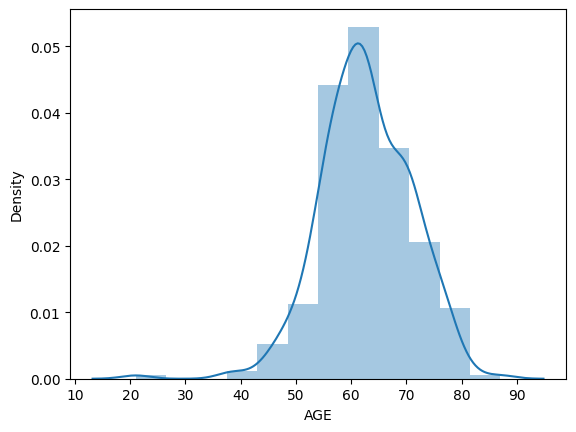

In [47]:
sns.distplot(dataset['AGE'],bins=12)  #Show a default plot with a kernel density estimate and histogram
plt.show()

## 5. **Count of lung cancer**

In [48]:
dataset["LUNG_CANCER"].value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

In [49]:
dataset.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER               int64
dtype: object

# 6.**Correlations between features**

<ipython-input-50-3d751baa9e78>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = dataset.corr(method = "spearman")


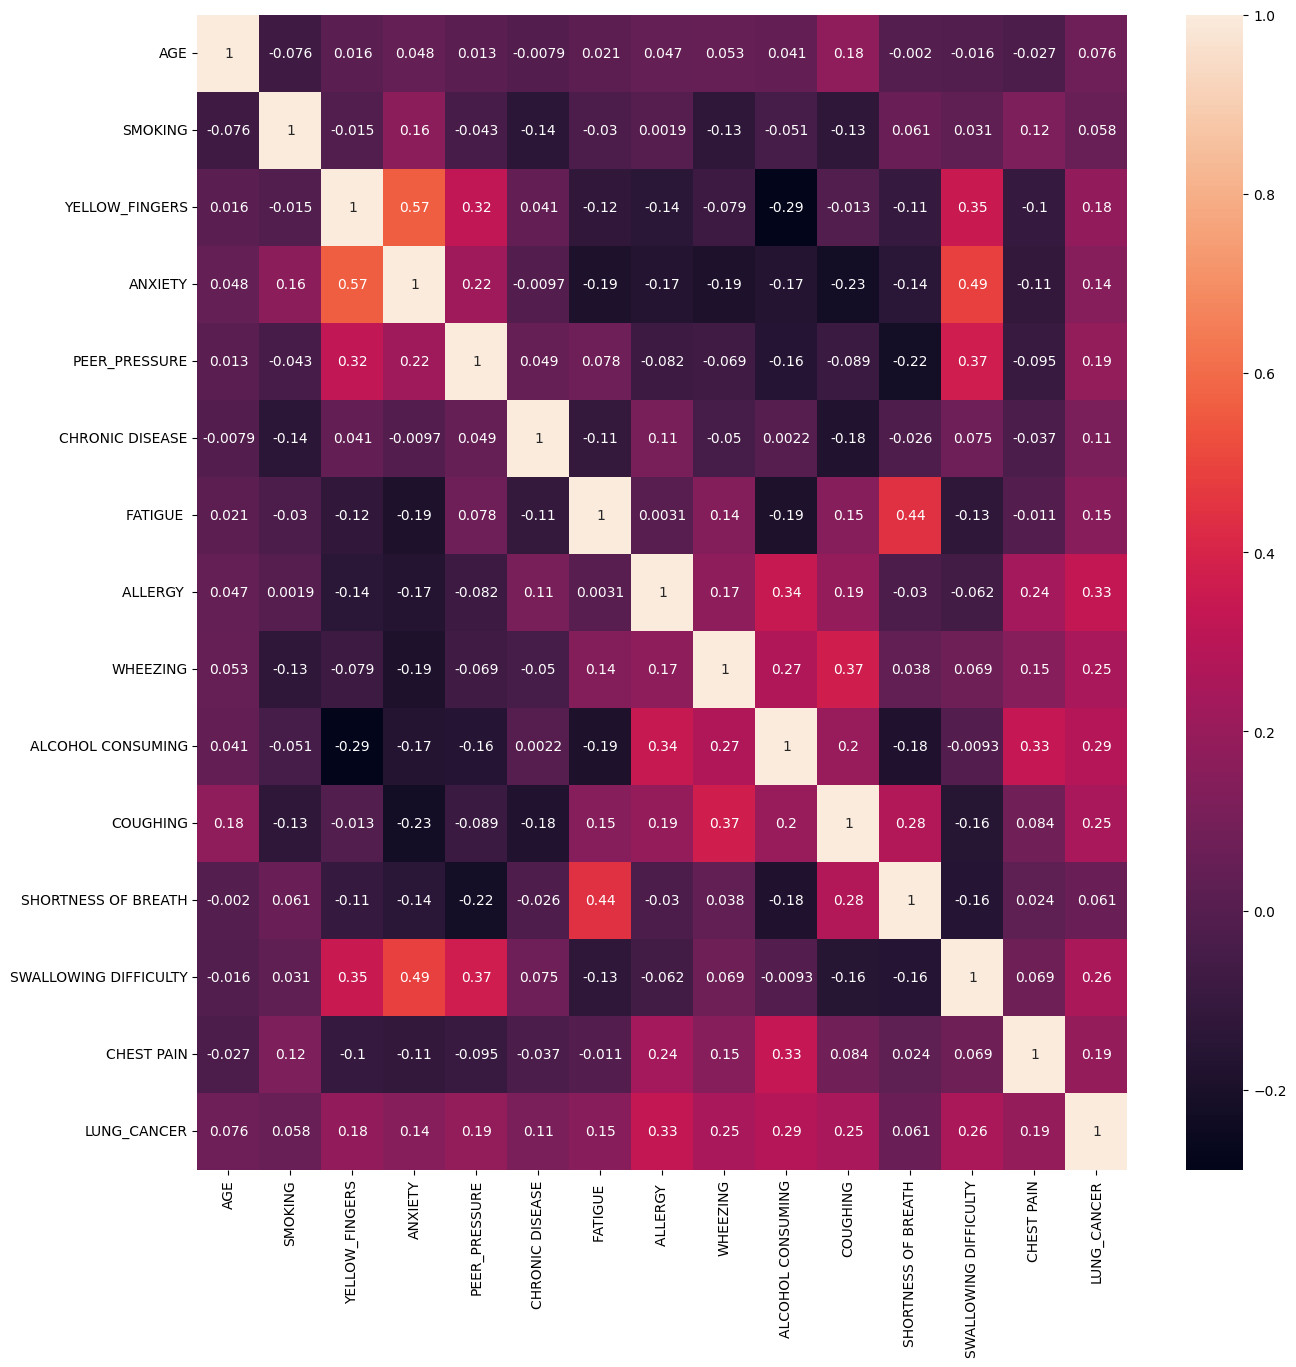

In [50]:
corrmat = dataset.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [51]:
dataset["GENDER"] = le.fit_transform(dataset["GENDER"])
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


## **Machine Learning to the Model**

In [52]:
dataset["LUNG_CANCER"].value_counts()


1    270
0     39
Name: LUNG_CANCER, dtype: int64

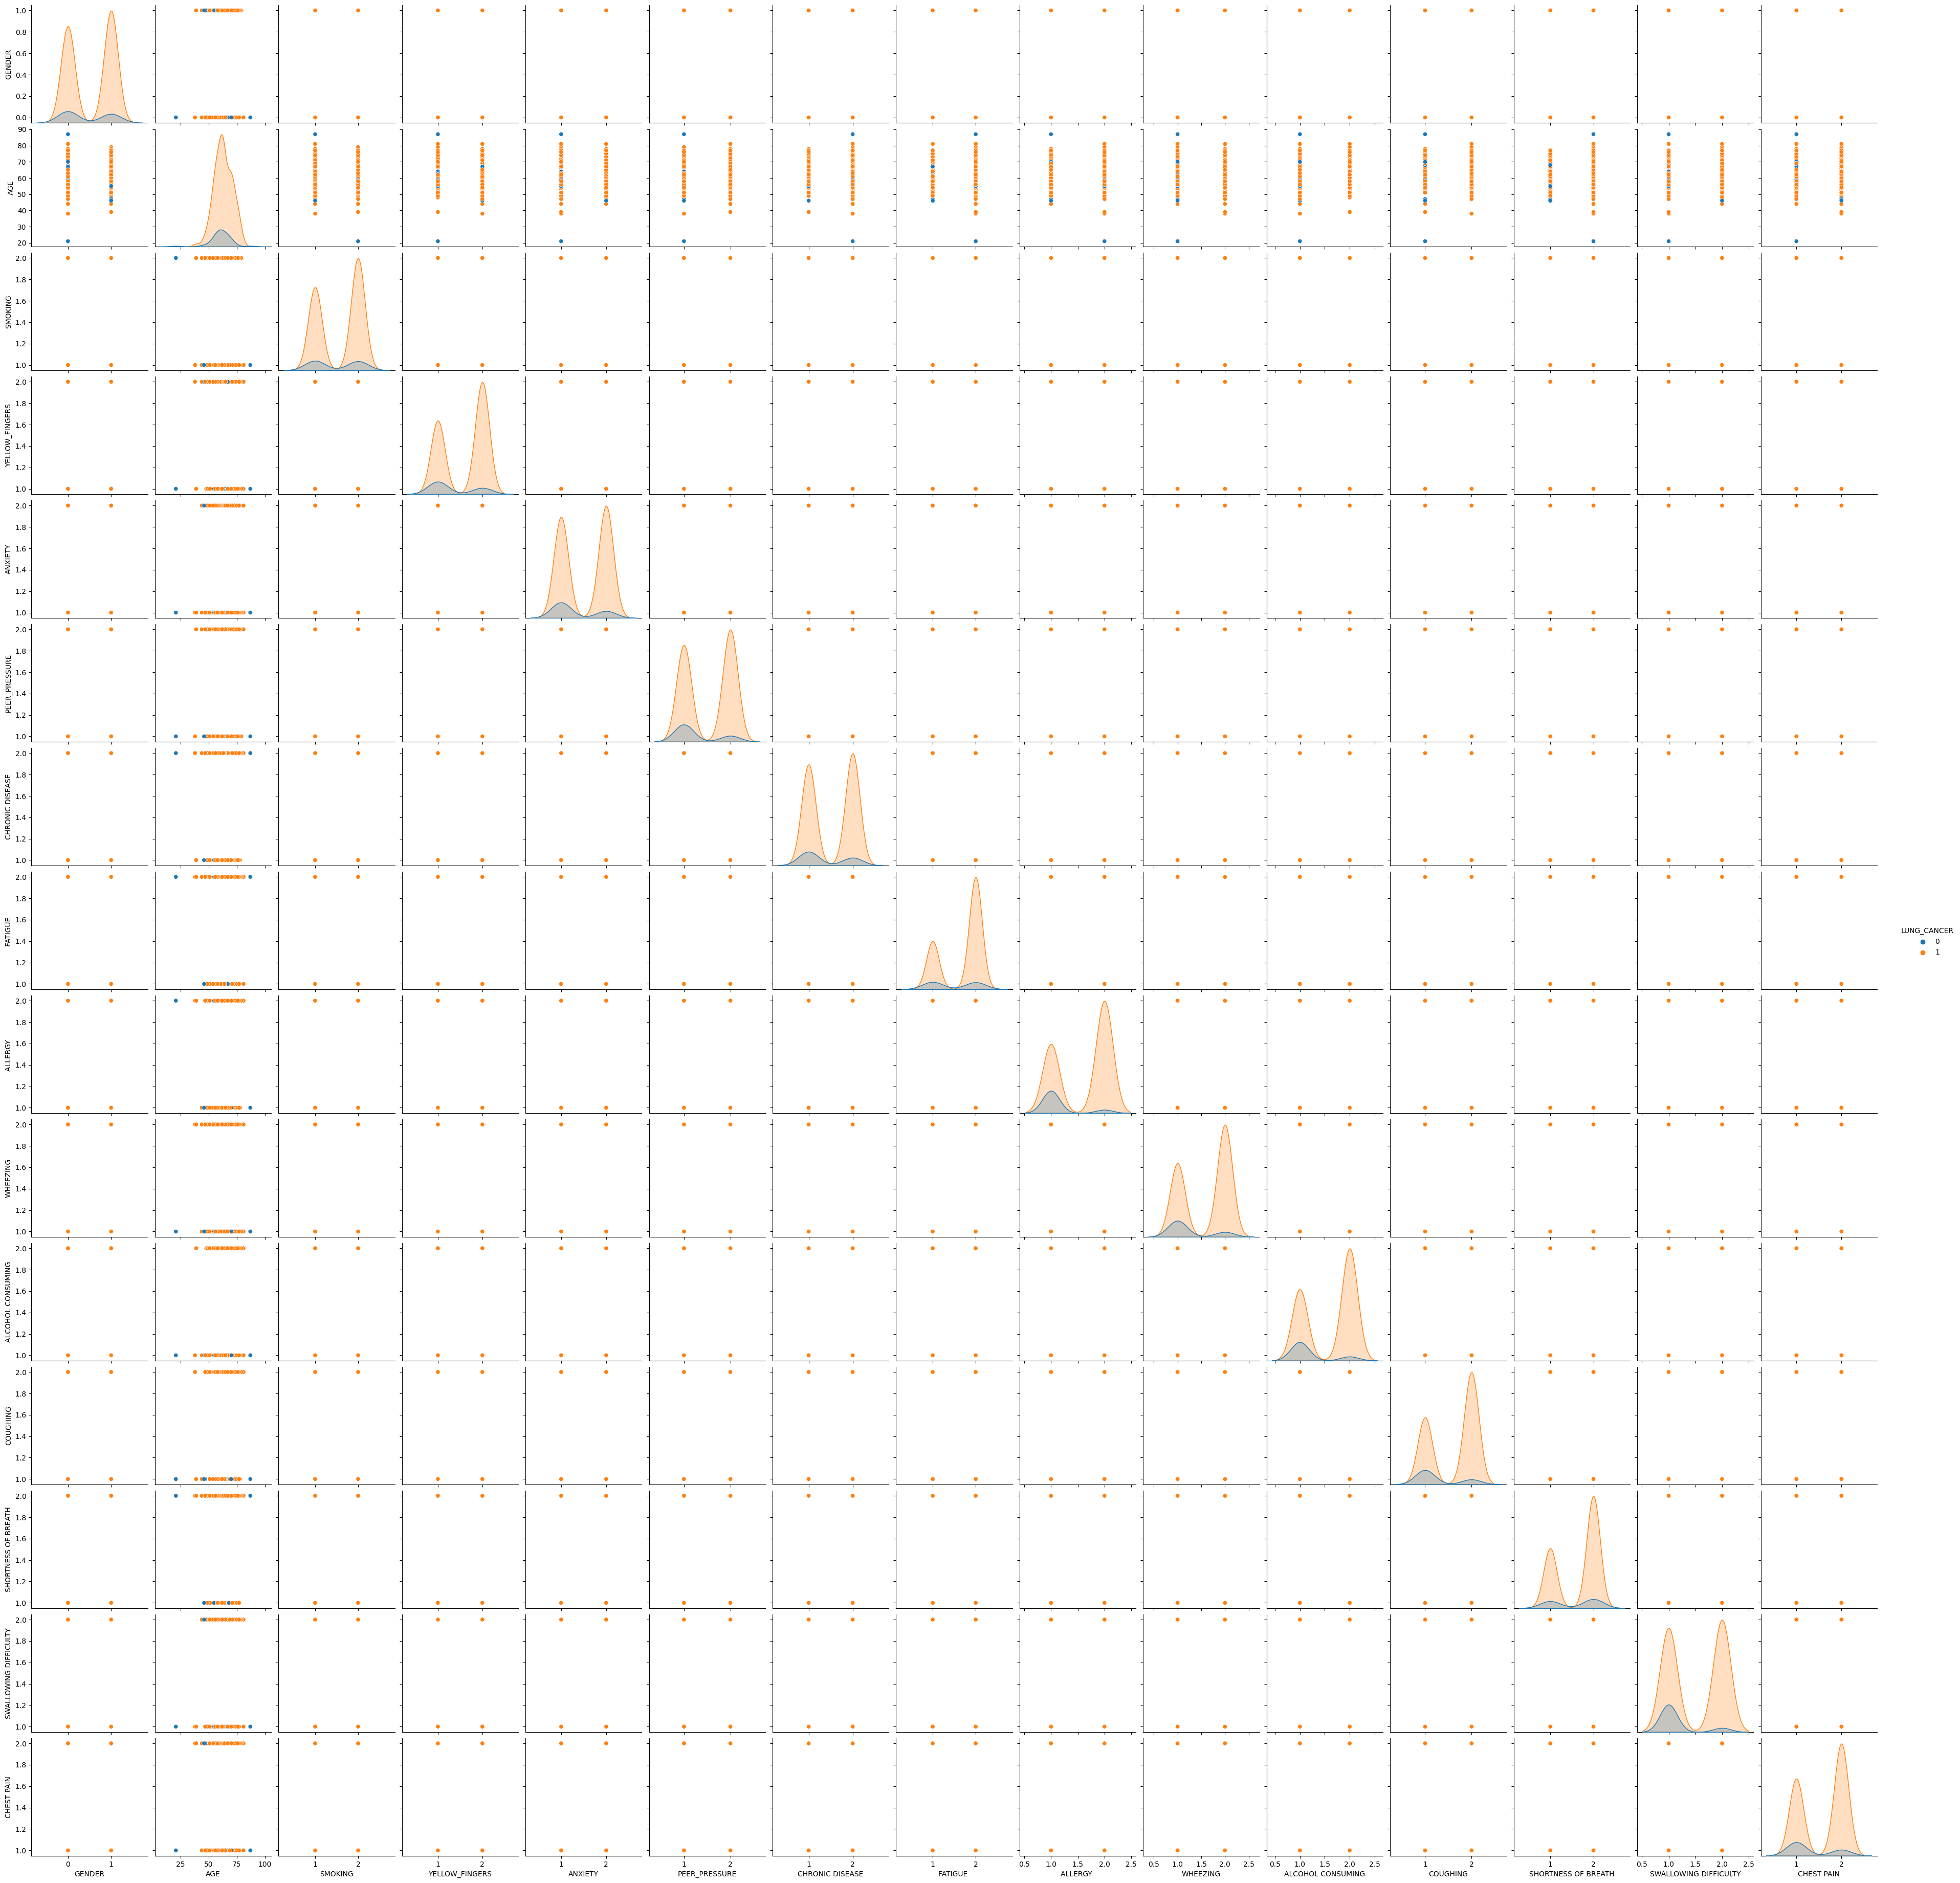

In [53]:
sns.pairplot(dataset,hue='LUNG_CANCER')

In [54]:
x = dataset.drop(["LUNG_CANCER"], axis = 1)
y = dataset["LUNG_CANCER"]

Using Over sampling

In [55]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
rs = RandomOverSampler(random_state=0)
X_res, y_res = rs.fit_resample(x, y)
print('original dataset shape %s' %Counter(y))
print('After oversampling dataset shape %s' %Counter(y_res))


original dataset shape Counter({1: 270, 0: 39})
After oversampling dataset shape Counter({1: 270, 0: 270})


## **Training and testing the model**

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=11)

## **Applying models to predict the accuracy of the dataset**

0.9722222222222222

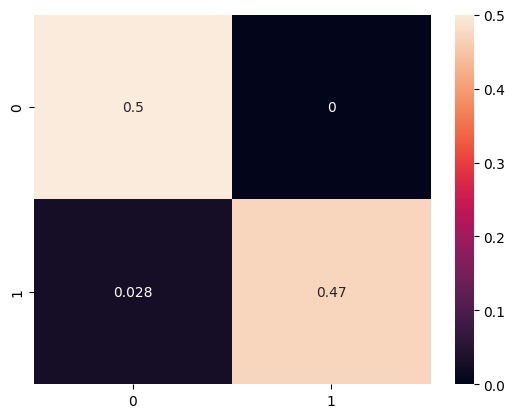

In [57]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
pred = model.predict(x_test)
score = accuracy_score(y_test, pred)
cn = confusion_matrix(y_test, pred)
ax = plt.subplot()
sns.heatmap(cn / np.sum(cn), annot = True, ax=ax)
plt.plot()
score

0.9351851851851852


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[]

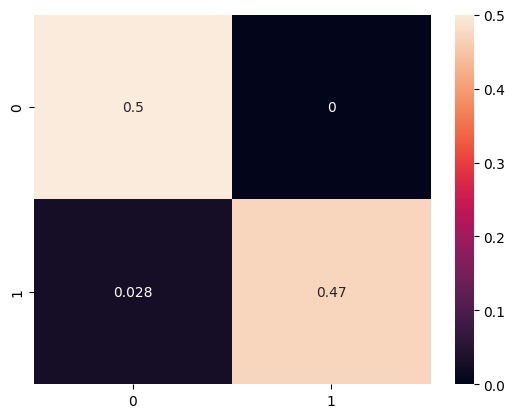

In [58]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred2 = logreg.predict(x_test)
print(accuracy_score(y_test,y_pred2))
ax = plt.subplot()
sns.heatmap(cn / np.sum(cn), annot = True, ax=ax)
plt.plot()

In [59]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
lasso_model = Lasso(alpha=0.1, max_iter= 100)
lasso_model.fit(x_train, y_train)
lasso_predictions = lasso_model.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Lasso MSE:", lasso_mse)

Lasso MSE: 0.23687745107301936


In [60]:
score1 = lasso_model.score(x_test, y_test)
score1

0.05249019570792257

In [61]:
ridge_model = Ridge(alpha=1.0, max_iter=100)
ridge_model.fit(x_train, y_train)
ridge_predictions = ridge_model.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge MSE:", ridge_mse)

Ridge MSE: 0.07266614867299245


In [62]:
score1 = ridge_model.score(x_test, y_test)
score1

0.7093354053080302